<a href="https://colab.research.google.com/github/Faizan06-ui/python-practice/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning project- Lending Club Loan Data Analysis

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# New Section

In [41]:
df = pd.read_csv('/content/loan_data (2).csv')

## Exploratory Data Analysis

In [42]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [43]:
df.isna().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [45]:
target = 'not.fully.paid'

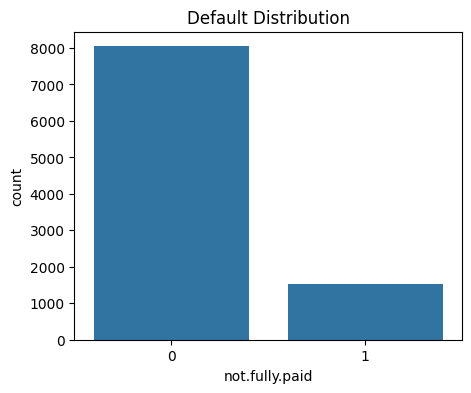

,proportion
not.fully.paid,
0,83.994571
1,16.005429


In [46]:
plt.figure(figsize=(5,4))
sns.countplot(x=df[target])
plt.title("Default Distribution")
plt.show()
df[target].value_counts(normalize=True) * 100

## Feature Transformation

In [47]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Correlation- check and drop highly correlated features

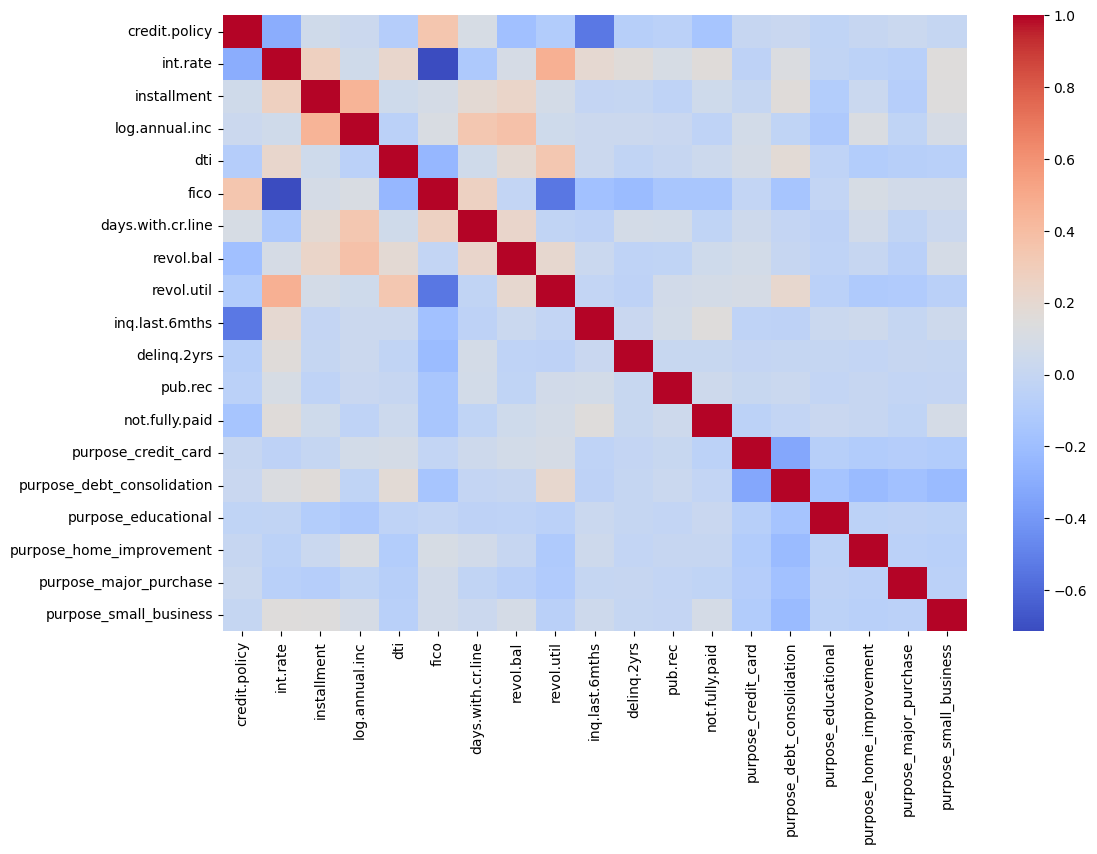

[]

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

# Drop columns with correlation > 0.85
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
df = df.drop(columns=to_drop)

to_drop

# Split Data

In [49]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle Class Imbalance

In [51]:
cw = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {i : cw[i] for i in range(len(cw))}
class_weights

{0: np.float64(0.5952454940957116), 1: np.float64(3.124796084828711)}

# Build Deep Learning Model (Keras + TensorFlow)

In [52]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),

    Dense(1, activation='sigmoid')  # binary output
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 384 (1.50 KB)

# Early Stopping callback

In [53]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,
    restore_best_weights=True
)

# Train the Model

In [54]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - AUC: 0.5742 - loss: 0.7637 - val_AUC: 0.6600 - val_loss: 0.7224
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - AUC: 0.6244 - loss: 0.7002 - val_AUC: 0.6608 - val_loss: 0.6895
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - AUC: 0.6489 - loss: 0.6542 - val_AUC: 0.6715 - val_loss: 0.6815
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6576 - loss: 0.6611 - val_AUC: 0.6772 - val_loss: 0.6661
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6763 - loss: 0.6466 - val_AUC: 0.6760 - val_loss: 0.6558
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.6740 - loss: 0.6558 - val_AUC: 0.6758 - val_loss: 0.6552
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.6746 - loss: 0.6275 - val_AUC: 0.6749 - val_loss: 0.6449
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.6964 - loss: 0.6385 - val_AUC: 0.6756 - val_loss: 0.6489
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6821 - los

# Training curves

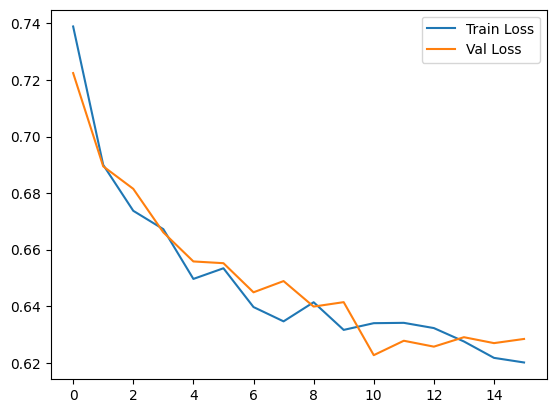

In [55]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.show()

# Model Evaluation

In [56]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.67      0.76      1609
           1       0.25      0.57      0.34       307

    accuracy                           0.65      1916
   macro avg       0.57      0.62      0.55      1916
weighted avg       0.79      0.65      0.70      1916

Confusion Matrix:
[[1073  536]
 [ 132  175]]


# ROC-AUC

In [57]:
y_pred_prob = model.predict(X_test_scaled)
roc_score = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_score)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ROC-AUC Score: 0.6714288317141163


# Predict on New Loan Example

In [58]:
sample = X.iloc[0:1]
sample_scaled = scaler.transform(sample)
model.predict(sample_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.34159228]], dtype=float32)